In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

import warnings
warnings.filterwarnings("ignore")

(600, 600, 3)


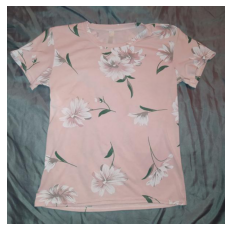

In [2]:
path_to_jpg_file = "/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16f1fbdf-d339-40f6-aecb-e55199db7a96.jpg"
img = mpimg.imread(path_to_jpg_file)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
pixels = img.reshape((-1,3))

print(pixels.shape)

(360000, 3)


In [4]:
pixels[0]

array([56, 50, 52], dtype=uint8)

## Kmeans Clustering

### Clustering for k=3

In [5]:
from sklearn.cluster import KMeans

In [6]:
n_clusters = 3
kmeans = KMeans(n_clusters,init='k-means++').fit(pixels)

c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,0,78.244969,80.566359,81.175649
1,58,52,54,0,78.244969,80.566359,81.175649
2,62,56,58,0,78.244969,80.566359,81.175649


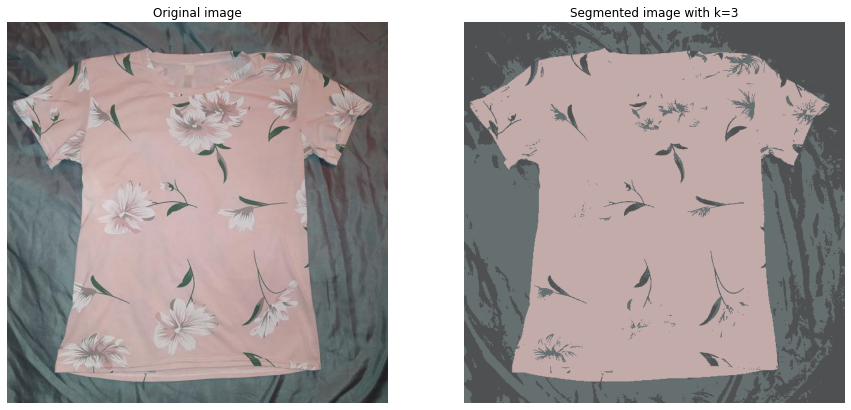

In [7]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

### Clustering for k=5

In [8]:
n_clusters = 5
kmeans = KMeans(n_clusters).fit(pixels)

c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,4,72.925896,73.311957,73.867018
1,58,52,54,4,72.925896,73.311957,73.867018
2,62,56,58,4,72.925896,73.311957,73.867018


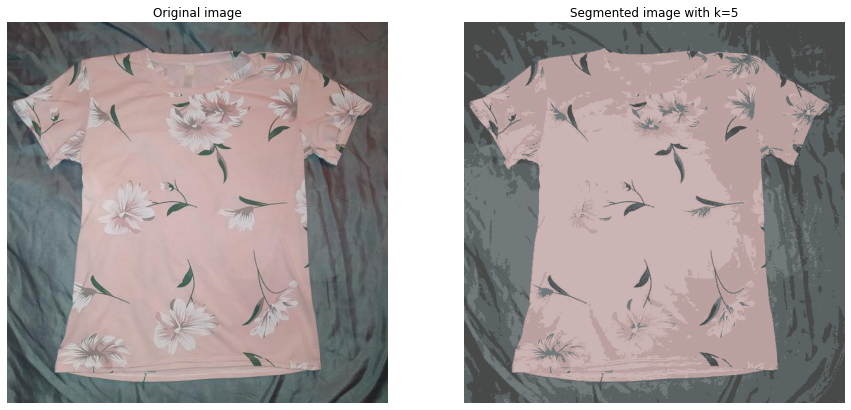

In [9]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

In [10]:
# a list of within-cluster sum of squares (WCSS) for each clustering solution
wcss =[]
k_range = range(2, 21)
for k in k_range:
    print(f'Processing k={k}')
    kmeans = KMeans(k)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)
    
wcss

Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20


[275895390.56074864,
 177645300.58905122,
 115716030.8493127,
 85813431.64401878,
 70580147.73906505,
 58611333.54440143,
 49862187.90602328,
 43470999.05448973,
 38703441.808827676,
 35441044.888516605,
 32512260.549901348,
 30161868.023905907,
 28181306.278021976,
 26220651.501151066,
 24863296.700480662,
 23532632.130813055,
 22312222.588880796,
 21012562.202280663,
 19924974.5696274]

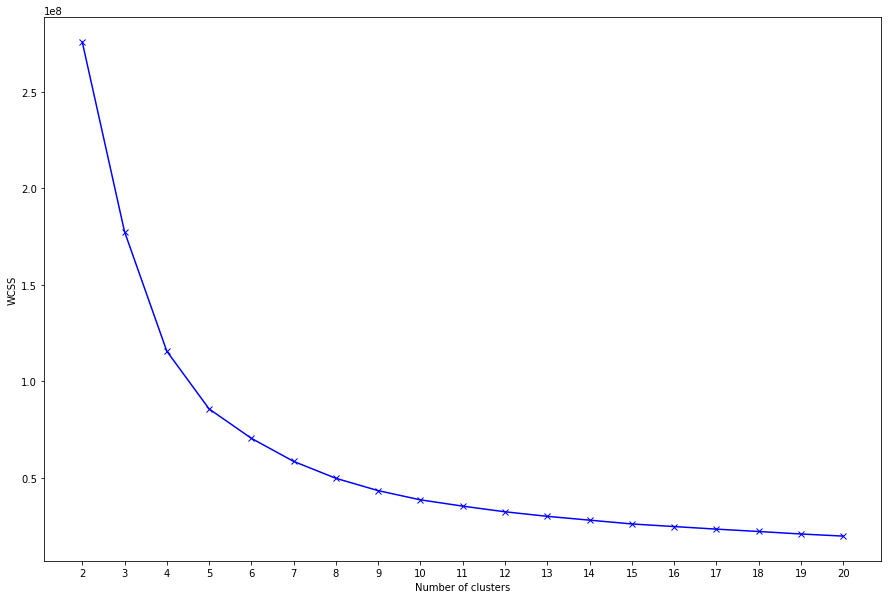

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(k_range, wcss, 'bx-')
ax.set_xticks(k_range)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

In [12]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [13]:
KMean= KMeans(n_clusters=5)
KMean.fit(pixels)

KMeans(n_clusters=5)

In [14]:
label=KMean.predict(pixels)

In [15]:
print(f'Silhouette Score(n=5): {silhouette_score(pixels, label)}')

Silhouette Score(n=5): 0.4812175612425893


In [16]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, label)}')

calinski_harabasz_score: 2259951.891329232


In [17]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, label)}')

davies_bouldin_score: 0.702112828971259


## Kmeans++

In [18]:
n_clusters = 5
kss = KMeans(n_clusters,init='k-means++').fit(pixels)

In [19]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kss.labels_ 

In [20]:
centers_map_R = {i:kss.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kss.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kss.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,2,72.925896,73.311957,73.867018
1,58,52,54,2,72.925896,73.311957,73.867018
2,62,56,58,2,72.925896,73.311957,73.867018


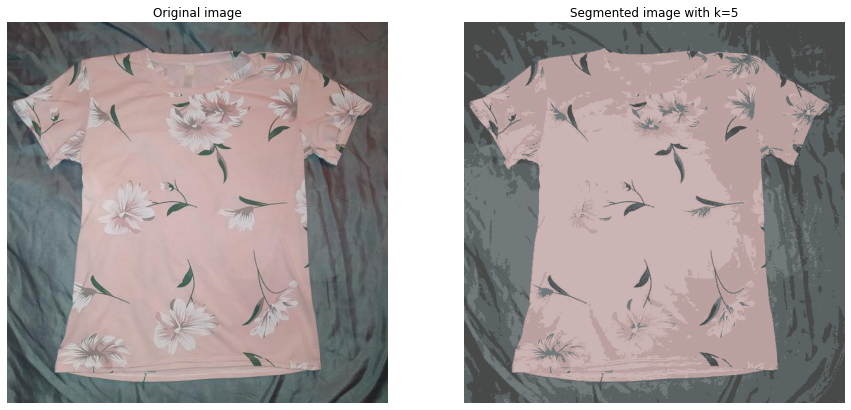

In [21]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

In [22]:
Kss= KMeans(n_clusters=5,init='k-means++')
Kss.fit(pixels)

KMeans(n_clusters=5)

In [23]:
label1=Kss.predict(pixels)

In [24]:
print(f'Silhouette Score(n=5): {silhouette_score(pixels, label1)}')

Silhouette Score(n=5): 0.48034318768527695


In [25]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, label1)}')

calinski_harabasz_score: 2260073.880195299


In [26]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, label1)}')

davies_bouldin_score: 0.703695164824174


## Minibatch 

In [27]:
from sklearn.cluster import MiniBatchKMeans

In [28]:
n_clusters = 5
mb = MiniBatchKMeans(n_clusters).fit(pixels)

In [29]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = mb.labels_ 

In [30]:
centers_map_R = {i:mb.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:mb.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:mb.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,56,50,52,0,70.608128,71.082811,71.838952
1,58,52,54,0,70.608128,71.082811,71.838952
2,62,56,58,0,70.608128,71.082811,71.838952


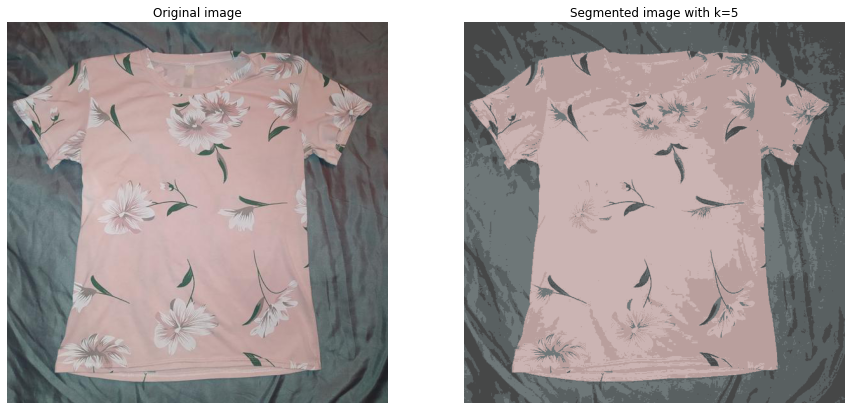

In [31]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

In [32]:
mb= MiniBatchKMeans(n_clusters=5)
mb.fit(pixels)

MiniBatchKMeans(n_clusters=5)

In [33]:
label2 = mb.predict(pixels)

In [34]:
print(f'Silhouette Score(n=5): {silhouette_score(pixels, label2)}')

Silhouette Score(n=5): 0.48152477705382


In [35]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, label2)}')

calinski_harabasz_score: 2259163.816687474


In [36]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, label2)}')

davies_bouldin_score: 0.7016299073068382


## Birch

In [37]:
from sklearn.cluster import Birch

In [38]:
bclust=Birch(n_clusters=None, branching_factor=200, threshold = 1).fit(pixels)
print(bclust)

Birch(branching_factor=200, n_clusters=None, threshold=1)


In [39]:
pred = bclust.predict(pixels)

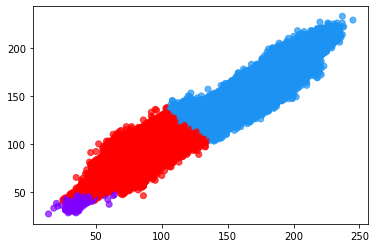

In [40]:
plt.scatter(pixels[:, 0], pixels[:, 1], c = pred,cmap = 'rainbow', alpha = 0.7)

In [41]:
print(f'Silhouette Score(n=5): {silhouette_score(pixels, pred)}')

Silhouette Score(n=5): 0.6720703457488516


In [42]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, pred)}')

calinski_harabasz_score: 1075558.2780287007


In [43]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, pred)}')

davies_bouldin_score: 0.3210813494312344
